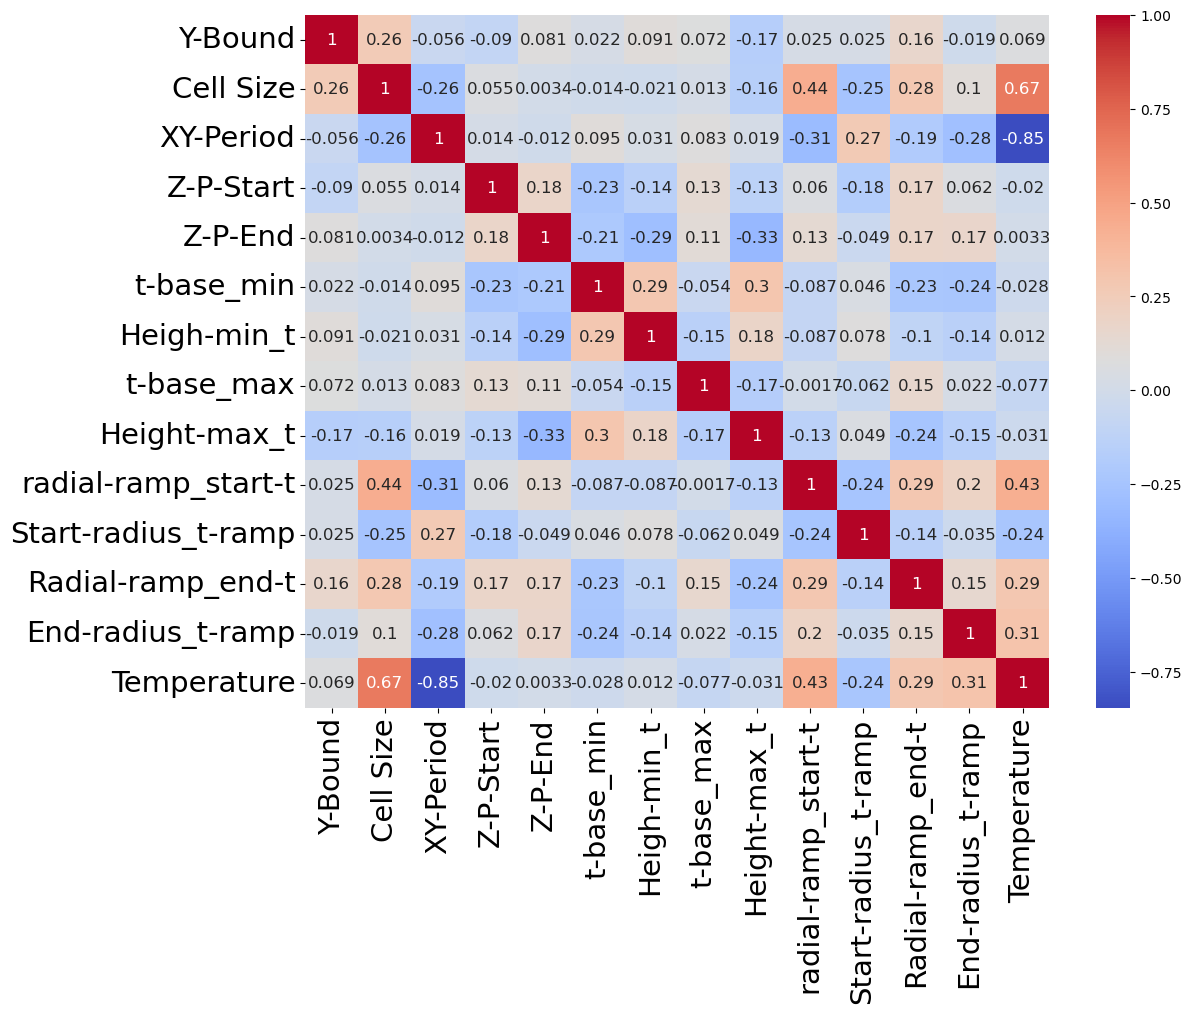

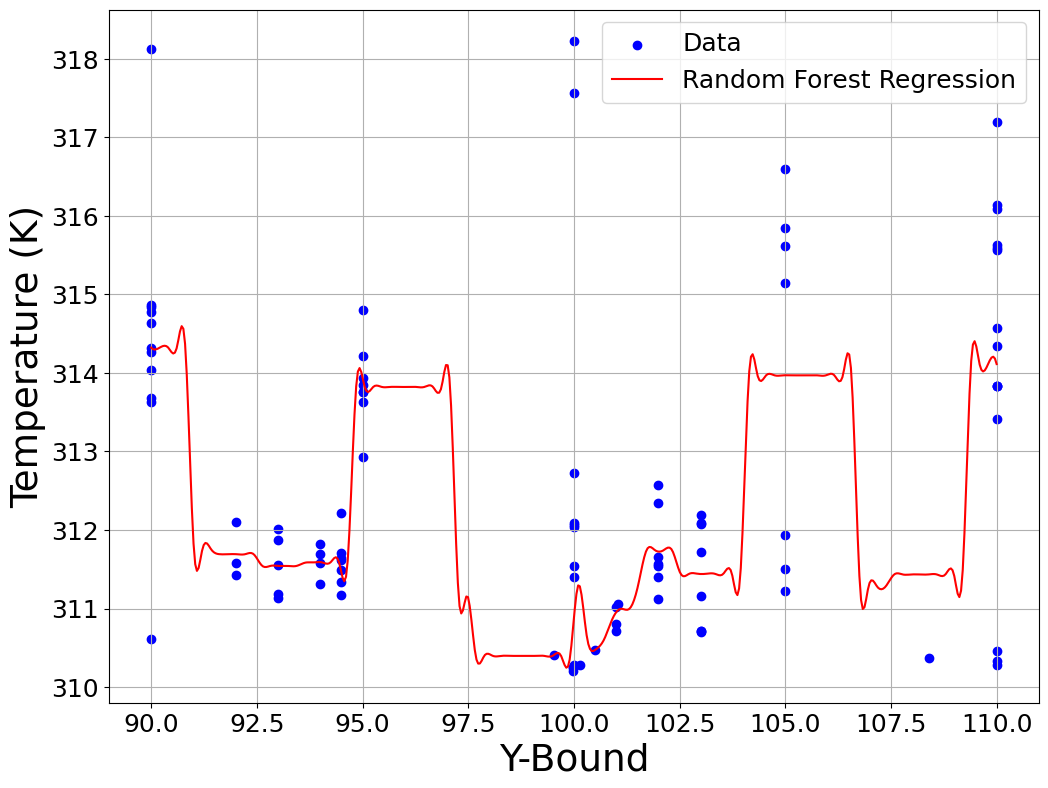

Best Y-Bound: 99.8989898989899
Lowest Predicted Temperature: 310.3472126641419


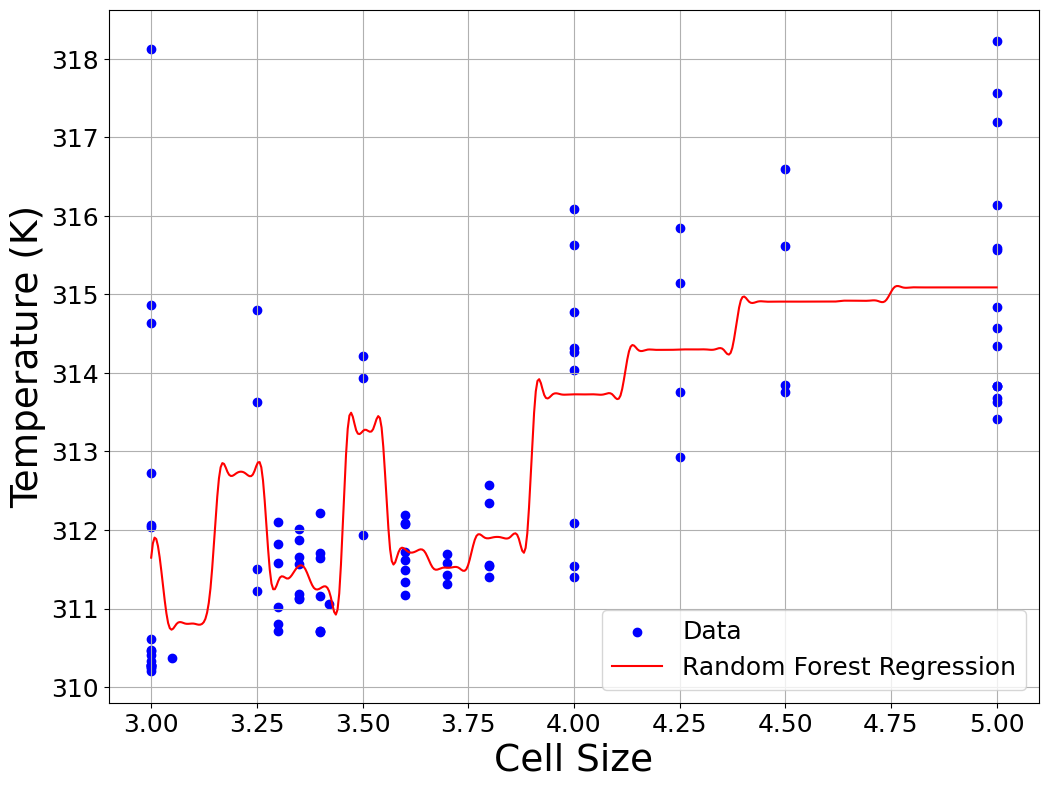

Best Cell Size: 3.04040404040404
Lowest Predicted Temperature: 310.80802900298363


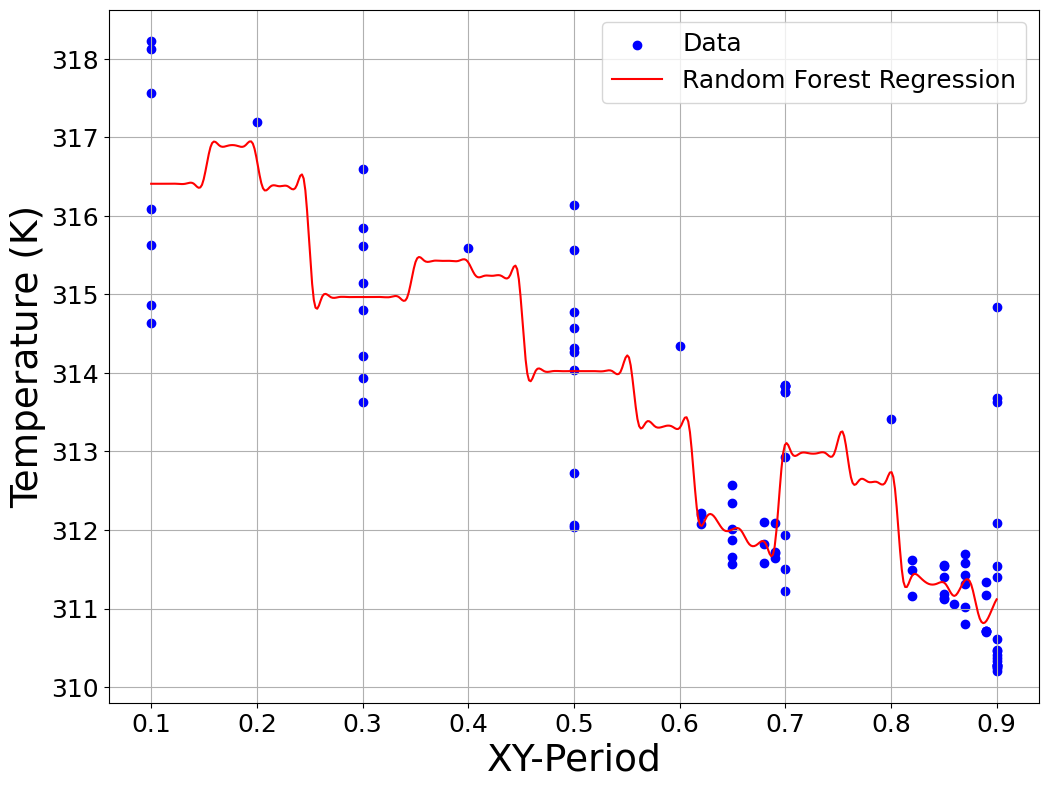

Best XY-Period: 0.8838383838383839
Lowest Predicted Temperature: 310.8788762431735


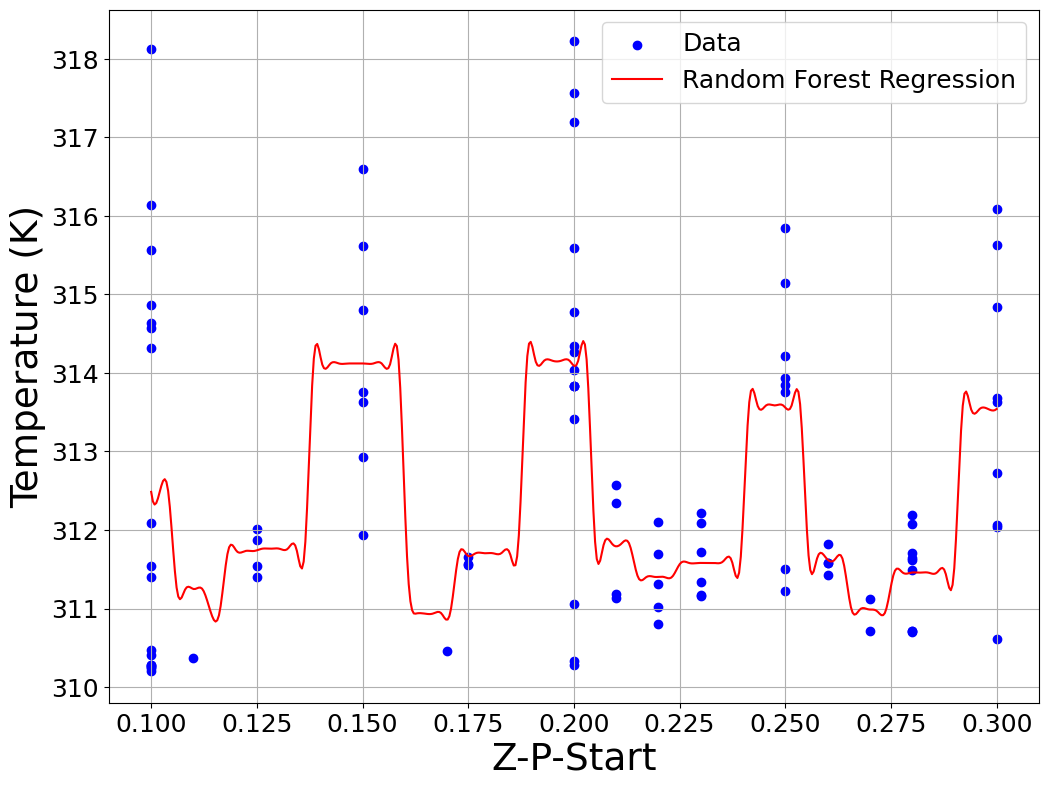

Best Z-P-Start: 0.16262626262626262
Lowest Predicted Temperature: 310.93606028932186


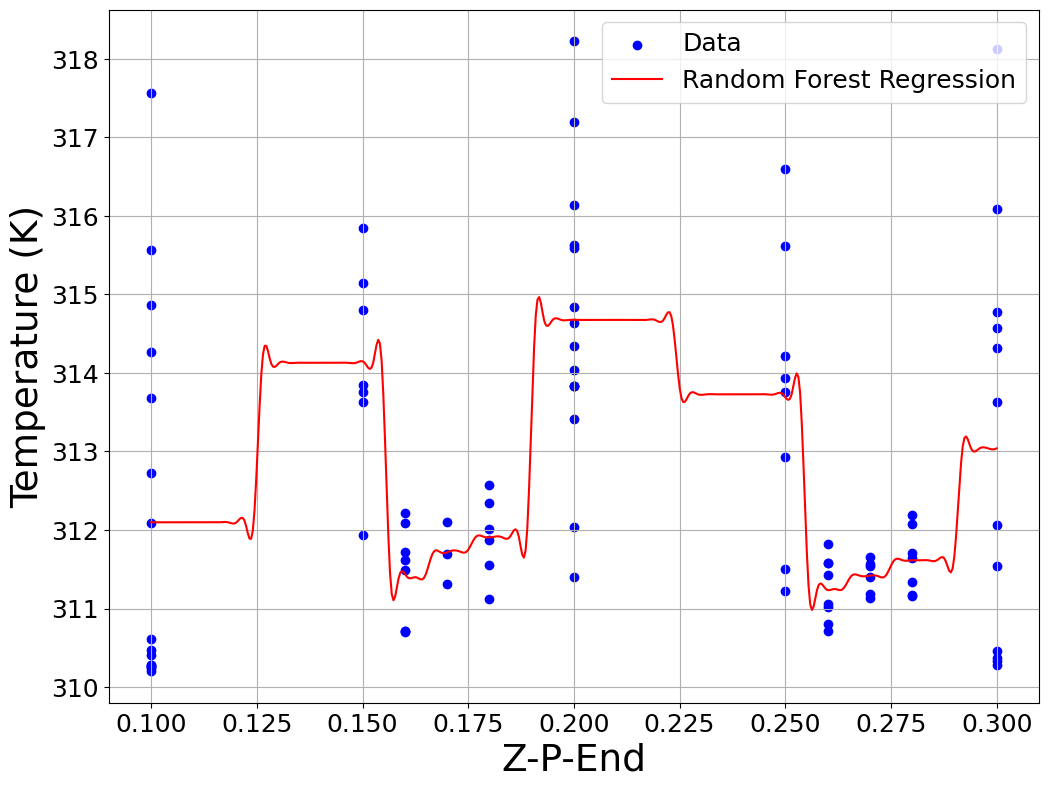

Best Z-P-End: 0.25555555555555554
Lowest Predicted Temperature: 311.249014438617


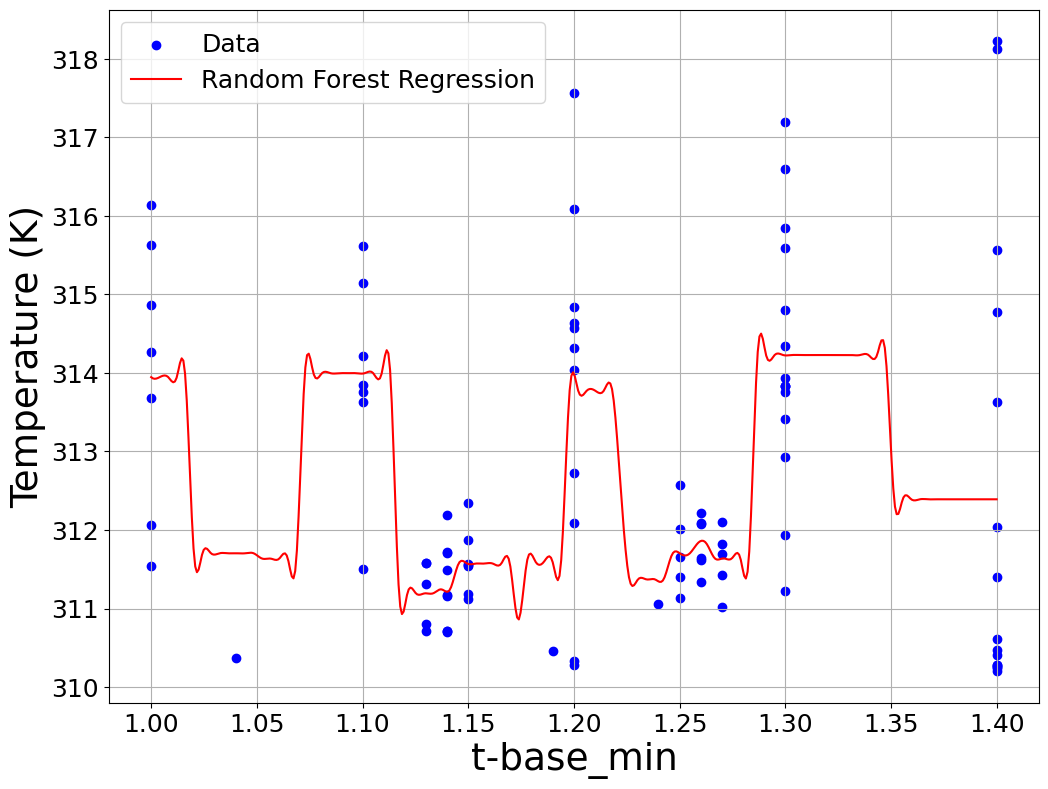

Best t-base_min: 1.1737373737373737
Lowest Predicted Temperature: 310.8563806302864


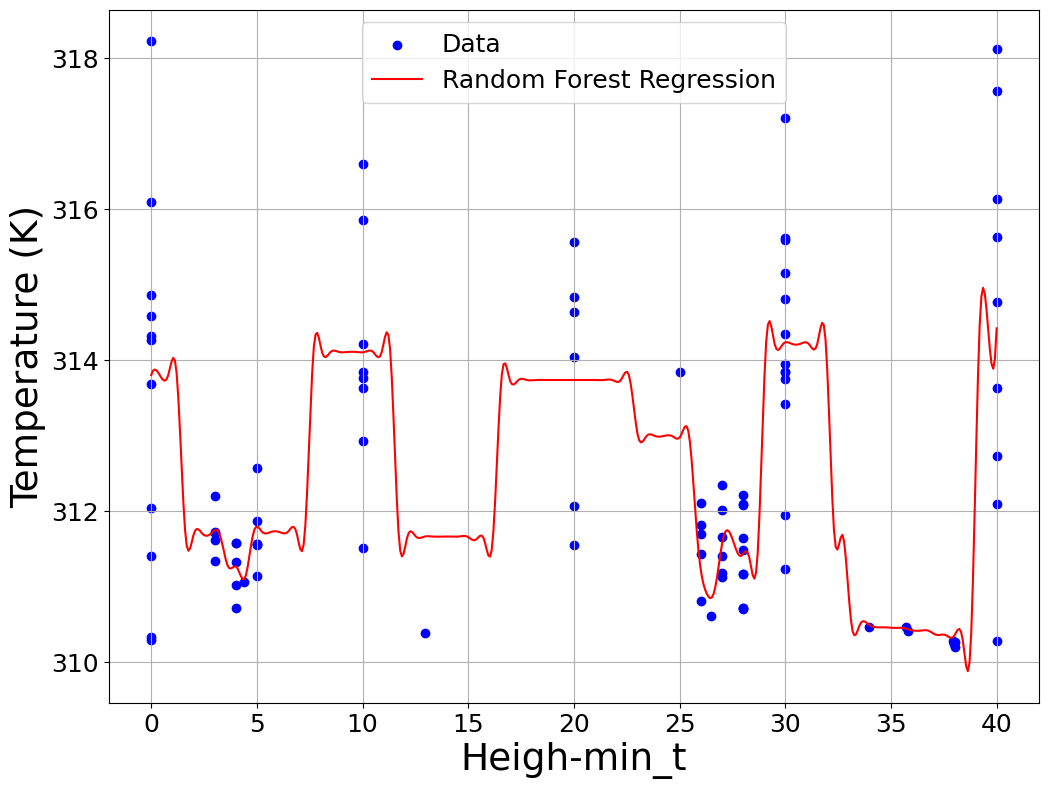

Best Heigh-min_t: 38.38383838383838
Lowest Predicted Temperature: 310.3114236363639


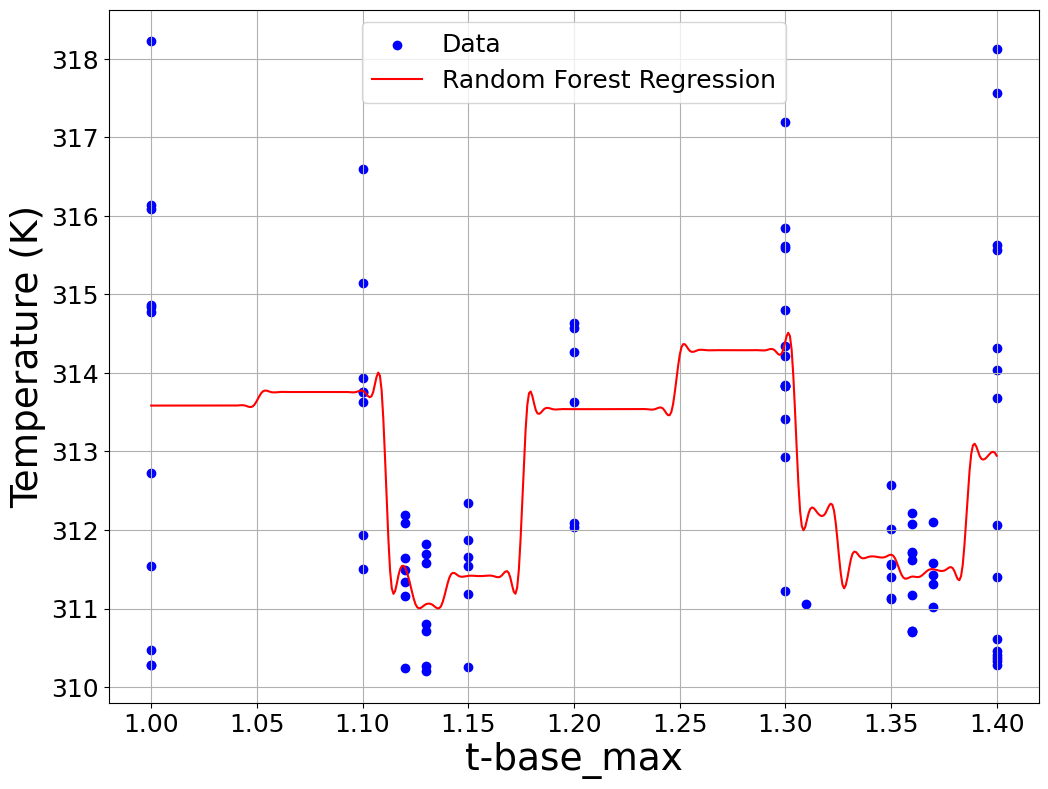

Best t-base_max: 1.1252525252525252
Lowest Predicted Temperature: 311.04341088934683


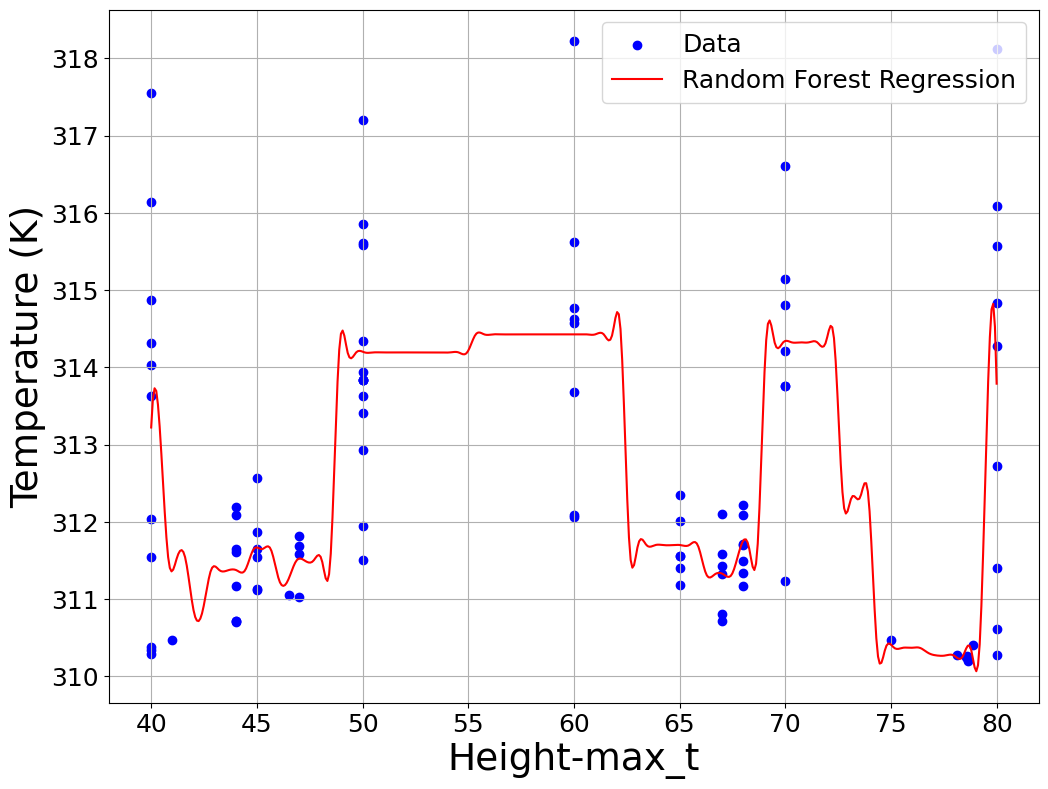

Best Height-max_t: 78.38383838383838
Lowest Predicted Temperature: 310.2510400000004


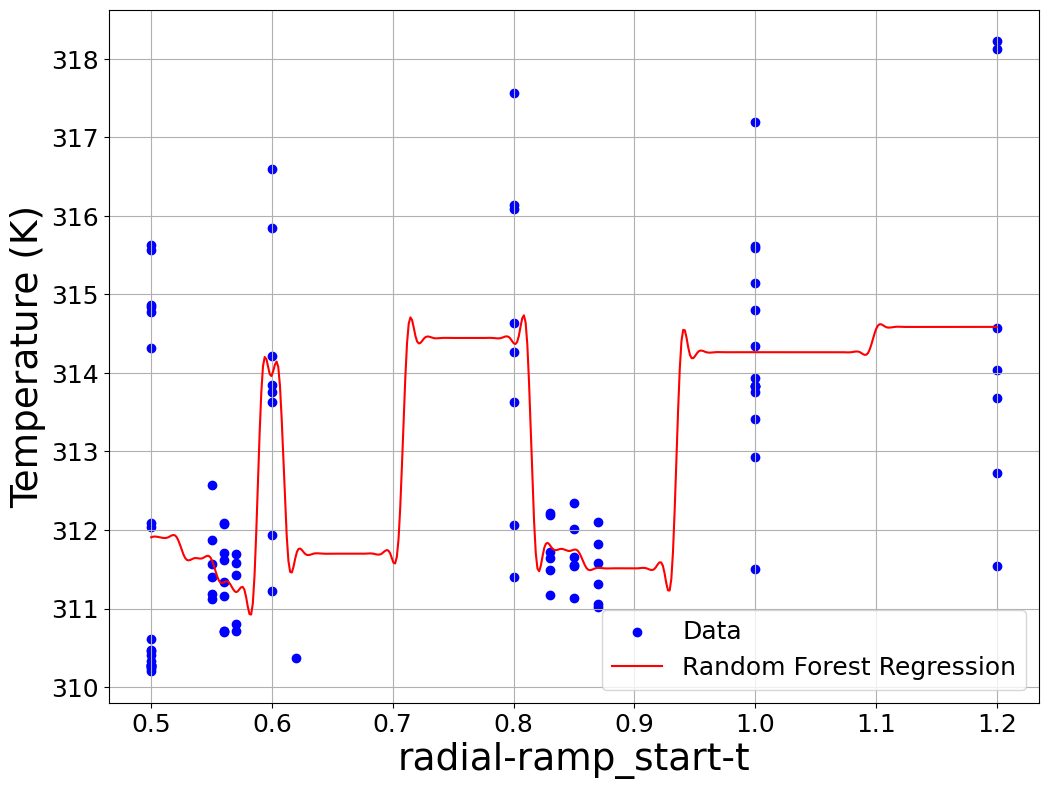

Best radial-ramp_start-t: 0.5707070707070707
Lowest Predicted Temperature: 311.2089495753969


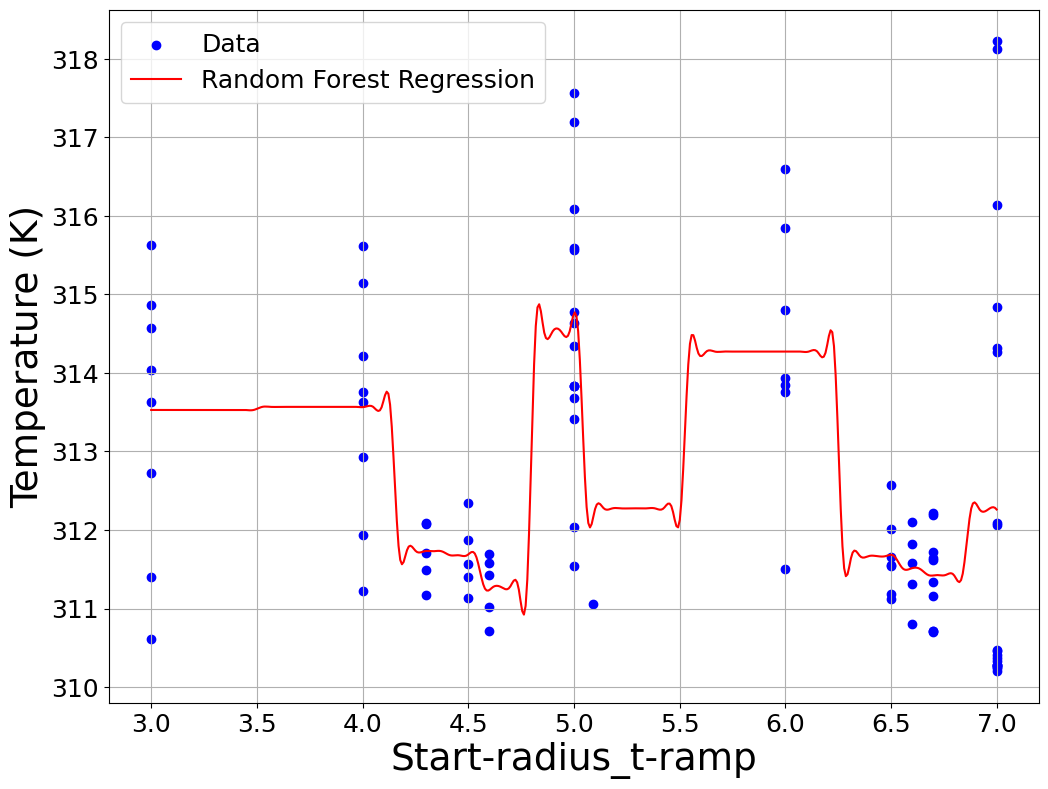

Best Start-radius_t-ramp: 4.575757575757576
Lowest Predicted Temperature: 311.2722906919191


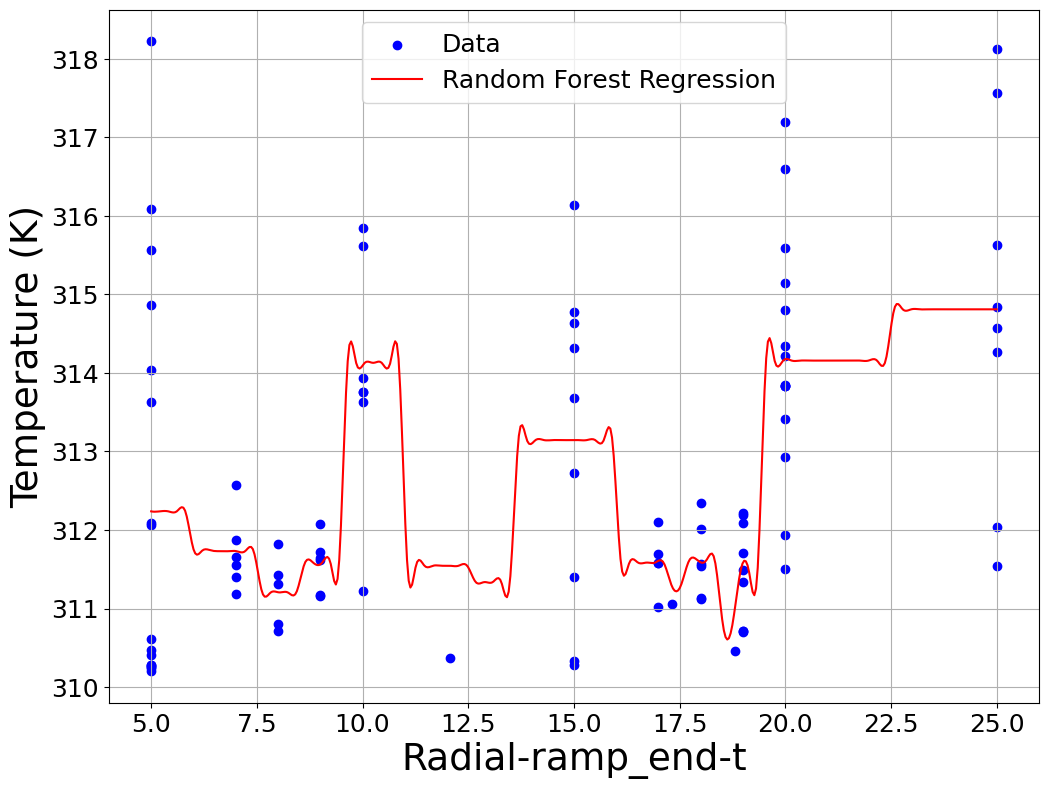

Best Radial-ramp_end-t: 18.535353535353536
Lowest Predicted Temperature: 310.7578701001637


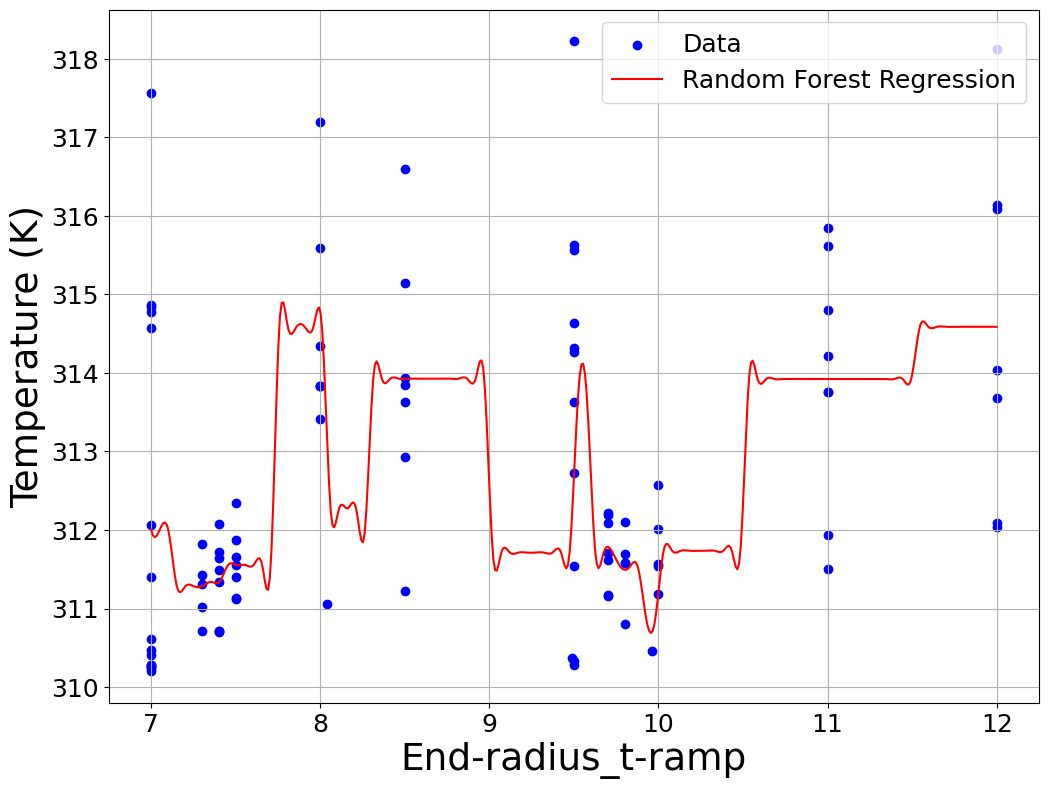

Best End-radius_t-ramp: 9.929292929292929
Lowest Predicted Temperature: 310.84650242857145


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from scipy.interpolate import interp1d

# Read the data from the CSV file
df = pd.read_csv("/Users/emirtuna/Desktop/aliminium_v2.csv")

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 9))
annot_format = "{:.3f}".format  # You can use f-strings or str.format
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", annot_kws={"size": 12})
#plt.title("Feature Correlation", fontsize=27)
plt.tick_params(axis='both', which='major', labelsize=21)
plt.show()

parameters = ['Y-Bound', 'Cell Size', 'XY-Period', 'Z-P-Start', 'Z-P-End',
       't-base_min', 'Heigh-min_t', 't-base_max', 'Height-max_t',
       'radial-ramp_start-t', 'Start-radius_t-ramp', 'Radial-ramp_end-t',
       'End-radius_t-ramp']

for param in parameters:
    # Separate the features and target variable
    X = df[param].values.reshape(-1, 1)
    y = df["Temperature"].values

    # Define the Random Forest regression model
    model = RandomForestRegressor()

    # Fit the model to the data
    model.fit(X, y)

    # Make predictions using the trained model
    X_pred = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_pred = model.predict(X_pred)

    # Interpolate between predicted points for smoother visualization
    interp_func = interp1d(X_pred.flatten(), y_pred, kind='cubic')
    X_smooth = np.linspace(X_pred.min(), X_pred.max(), 500).reshape(-1, 1)
    y_smooth = interp_func(X_smooth.flatten())

    # Plot the data points and the smoothed line
    plt.figure(figsize=(12,9))
    plt.tick_params(axis='both', which='major', labelsize=18)

    # Plot the data points as circles ("o")
    plt.scatter(X, y, color='blue', label="Data")

    # Plot the smoothed line
    plt.plot(X_smooth, y_smooth, color='red', label="Random Forest Regression")

    # Set plot title and labels
    #plt.title("Temperature vs " + param, fontsize=32)
    plt.xlabel(param, fontsize=27)
    plt.ylabel("Temperature (K)", fontsize=27)

    # Add gridlines
    plt.grid(True)

    # Add legend
    plt.legend(fontsize = 18)

    # Show the plot
    plt.show()

    # Range of cell sizes
    cell_sizes = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

    # Predict temperatures for the range of cell sizes
    temperatures = model.predict(cell_sizes)

    # Find the index of the cell size with the lowest predicted temperature
    best_cell_size_index = np.argmin(temperatures)

    # Get the best cell size value
    best_cell_size = cell_sizes[best_cell_size_index][0]

    # Print the best cell size value and its corresponding lowest predicted temperature
    print(f"Best {param}: {best_cell_size}")
    print(f"Lowest Predicted Temperature: {temperatures[best_cell_size_index]}") 
